# COVID-19 DATA READER ( WORK IN PROGRESS): 
## To update goto  "Cell->Run All")

## WARNING: ECDC switched to a weekly reporting schedule for the COVID-19 situation worldwide and in the EU/EEA and the UK on 17 December this year.

## Scroll down the page in order to see the graphs. 

- Date of the data. The ECDC data is updated around 13h00 and refers to the day before.

"ECDC switched to a weekly reporting schedule for the COVID-19 situation worldwide and in the EU/EEA and the UK on 17 December this year. Hence, all daily updates have been discontinued from 14 December. ECDC will publish updates on the number of cases and deaths reported worldwide and aggregated by week every Thursday. The weekly data will be available as downloadable files in the following formats: XLSX, CSV, JSON and XML. As an exception, the weekly updates for the end-of-year festive season will be published on 23 December and 30 December 2020."

In [89]:
from datetime import date
print(date.today())

2020-12-23


- Required python modules 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

- MA stands for the time period in days for the averaging. Higher MA results in smoother graphs 
     + MA=1 -> no averaging; MA=14 -> two weaks averaging. 

In [17]:
MA=2 # FOR MOVING AVERAGES 2 WEEKS
def moving_average(data_set, periods):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

## ECDC data for cases and deaths and Johns Hopkins for the recovered 

In [91]:
# ECDC open database
urlcsv='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv'
#urlcsv='data.csv'
# Create a pandas dataframe from the csv database
df = pd.read_csv(urlcsv, encoding = "ISO-8859-1")
# date format
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')
df=df.rename(columns={'cases_weekly':'cases','deaths_weekly':'deaths'})

# Get IDS from the listed countries
countries=df['countriesAndTerritories'].unique()
geoIDS=df['geoId'].unique()

### TO BE UPDATED: Base de Dados Johns Hopkins Recovered
##recov='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
##dfr=pd.read_csv(recov)

## Countries selection and data treatment

In [105]:
IDs=({'geoId':'PT','country': 'Portugal', 'color':'b','ls': '-.','markers': '.'},
     {'geoId':'ES','country': 'Spain', 'color':'y','ls': '-','markers': ''},
     {'geoId':'IT','country': 'Italy', 'color':'g','ls': '-','markers': ''},
     {'geoId':'FR','country': 'France', 'color':'r','ls': '-','markers': ''},
     {'geoId':'SE','country': 'Sweden', 'color':'c','ls': '-','markers': ''},
     {'geoId':'CH','country': 'Switzerland', 'color':'brown','ls': '-','markers': '+'},
     {'geoId':'DE','country': 'Germany', 'color':'purple','ls': '-','markers': ''},
     {'geoId':'UK','country': 'United Kingdom', 'color':'coral','ls': '-','markers': ''},
     {'geoId':'BR','country': 'Brazil', 'color':'silver','ls': '-','markers': ''},
     {'geoId':'US','country': 'USA', 'color':'cyan','ls': (0, (1, 1)),'markers': ''},
     {'geoId':'JP','country': 'Japan', 'color':'gold','ls': '-.','markers': ''},
     {'geoId':'NL','country': 'Netherlands', 'color':'rosybrown','ls': (0, (2, 1, 1, 1)),'markers': ''},
     {'geoId':'BE','country': 'Belgium', 'color':'fuchsia','ls':(0, (3, 1, 1, 1)),'markers': '.'},
     {'geoId':'RU','country': 'Russia', 'color':'slategray','ls':  (0, (4, 1, 3, 7)),'markers': ''},
     {'geoId':'EL','country': 'Greece', 'color':'peru','ls': (1, (1, 10, 1, 5)),'markers': '*'},
     {'geoId':'TR','country': 'Turkey', 'color':'rebeccapurple','ls': (1, (1, 3, 1, 10)),'markers': '.'},
     {'geoId':'HU','country': 'Hungary', 'color':'forestgreen','ls': (1, (3, 3, 3, 3)),'markers': ''},
     {'geoId':'AT','country': 'Austria', 'color':'gainsboro','ls': (1, (4, 1, 3, 4)),'markers': '*'},
     {'geoId':'CZ','country': 'Czechia', 'color':'burlywood','ls': (1, (5, 1, 1, 5)),'markers': '+'})
       

countries_df=[]
for country_index,ID in enumerate(IDs): 
    countries_df.append(df[df['geoId'] == ID['geoId']])

NW=0 #Number Of Weeks Since 2020-01-01  
for country_index,ID in enumerate(IDs): 
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    M=len(countries_df[country_index]['notification_rate_per_100000_population_14-days'].values)
    if M>NW: NW=M
print(NW)

#countries_df[0]

51


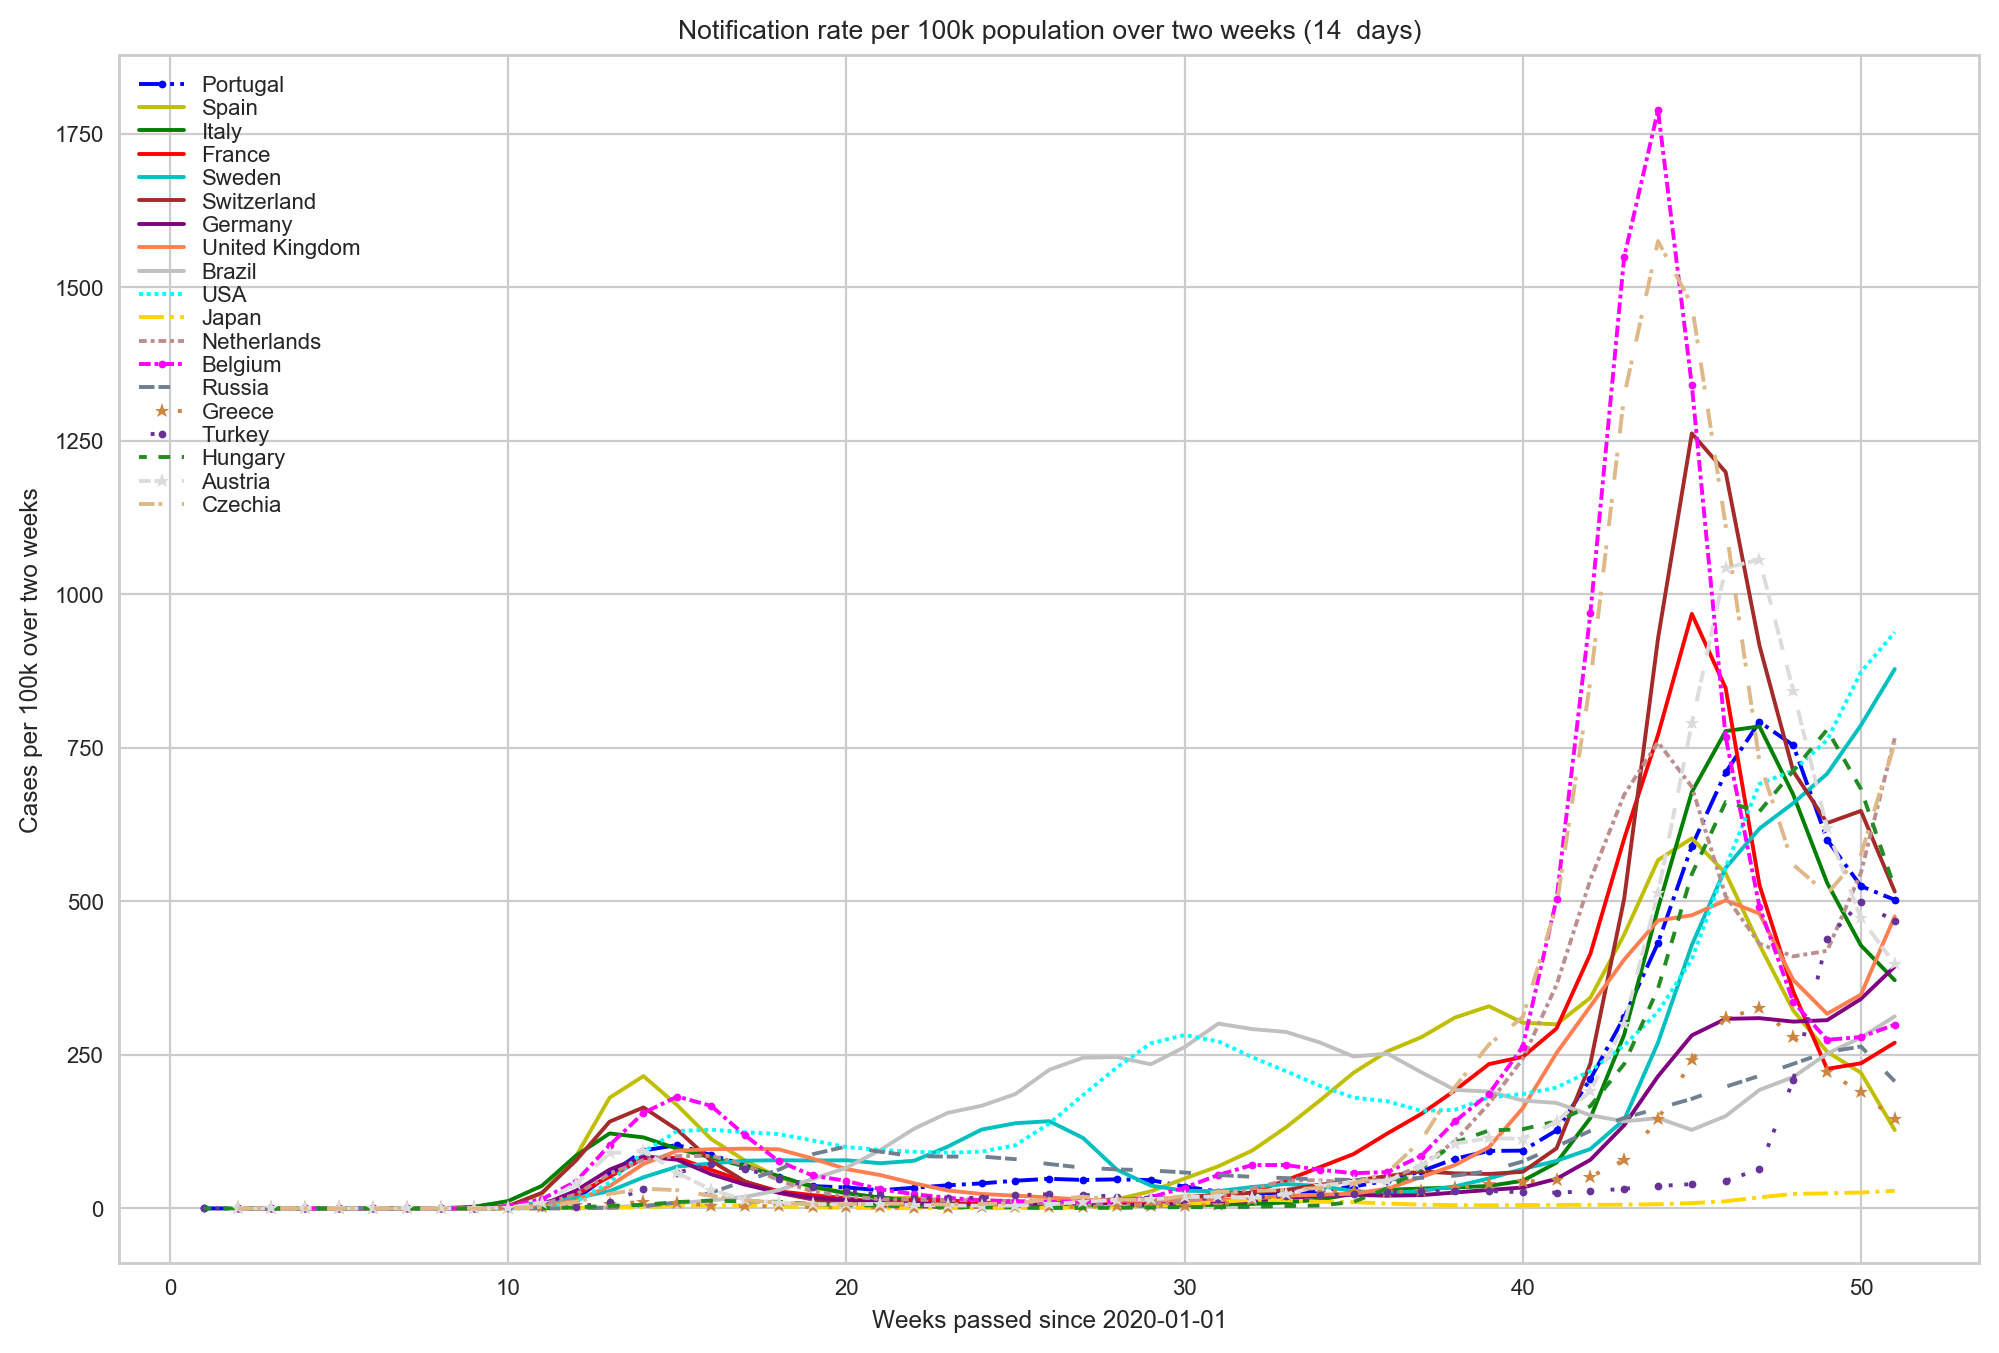

In [115]:
%matplotlib  inline
style.use('seaborn-paper')
style.use('seaborn-pastel') 
style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [12,8]
#plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'legend.labelspacing':0.15})

for country_index,ID in enumerate(IDs): 
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    y=np.zeros(NW)
    x=np.arange(1,NW+1)
    NWcountry=len(countries_df[country_index]['cases'].values)
    y[:NWcountry]=countries_df[country_index]['notification_rate_per_100000_population_14-days'].values
    plt.plot(x,y[::-1],label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   
plt.legend()
plt.xlabel("Weeks passed since 2020-01-01")
plt.ylabel("Cases per 100k over two weeks")
plt.title("Notification rate per 100k population over two weeks (14  days)");

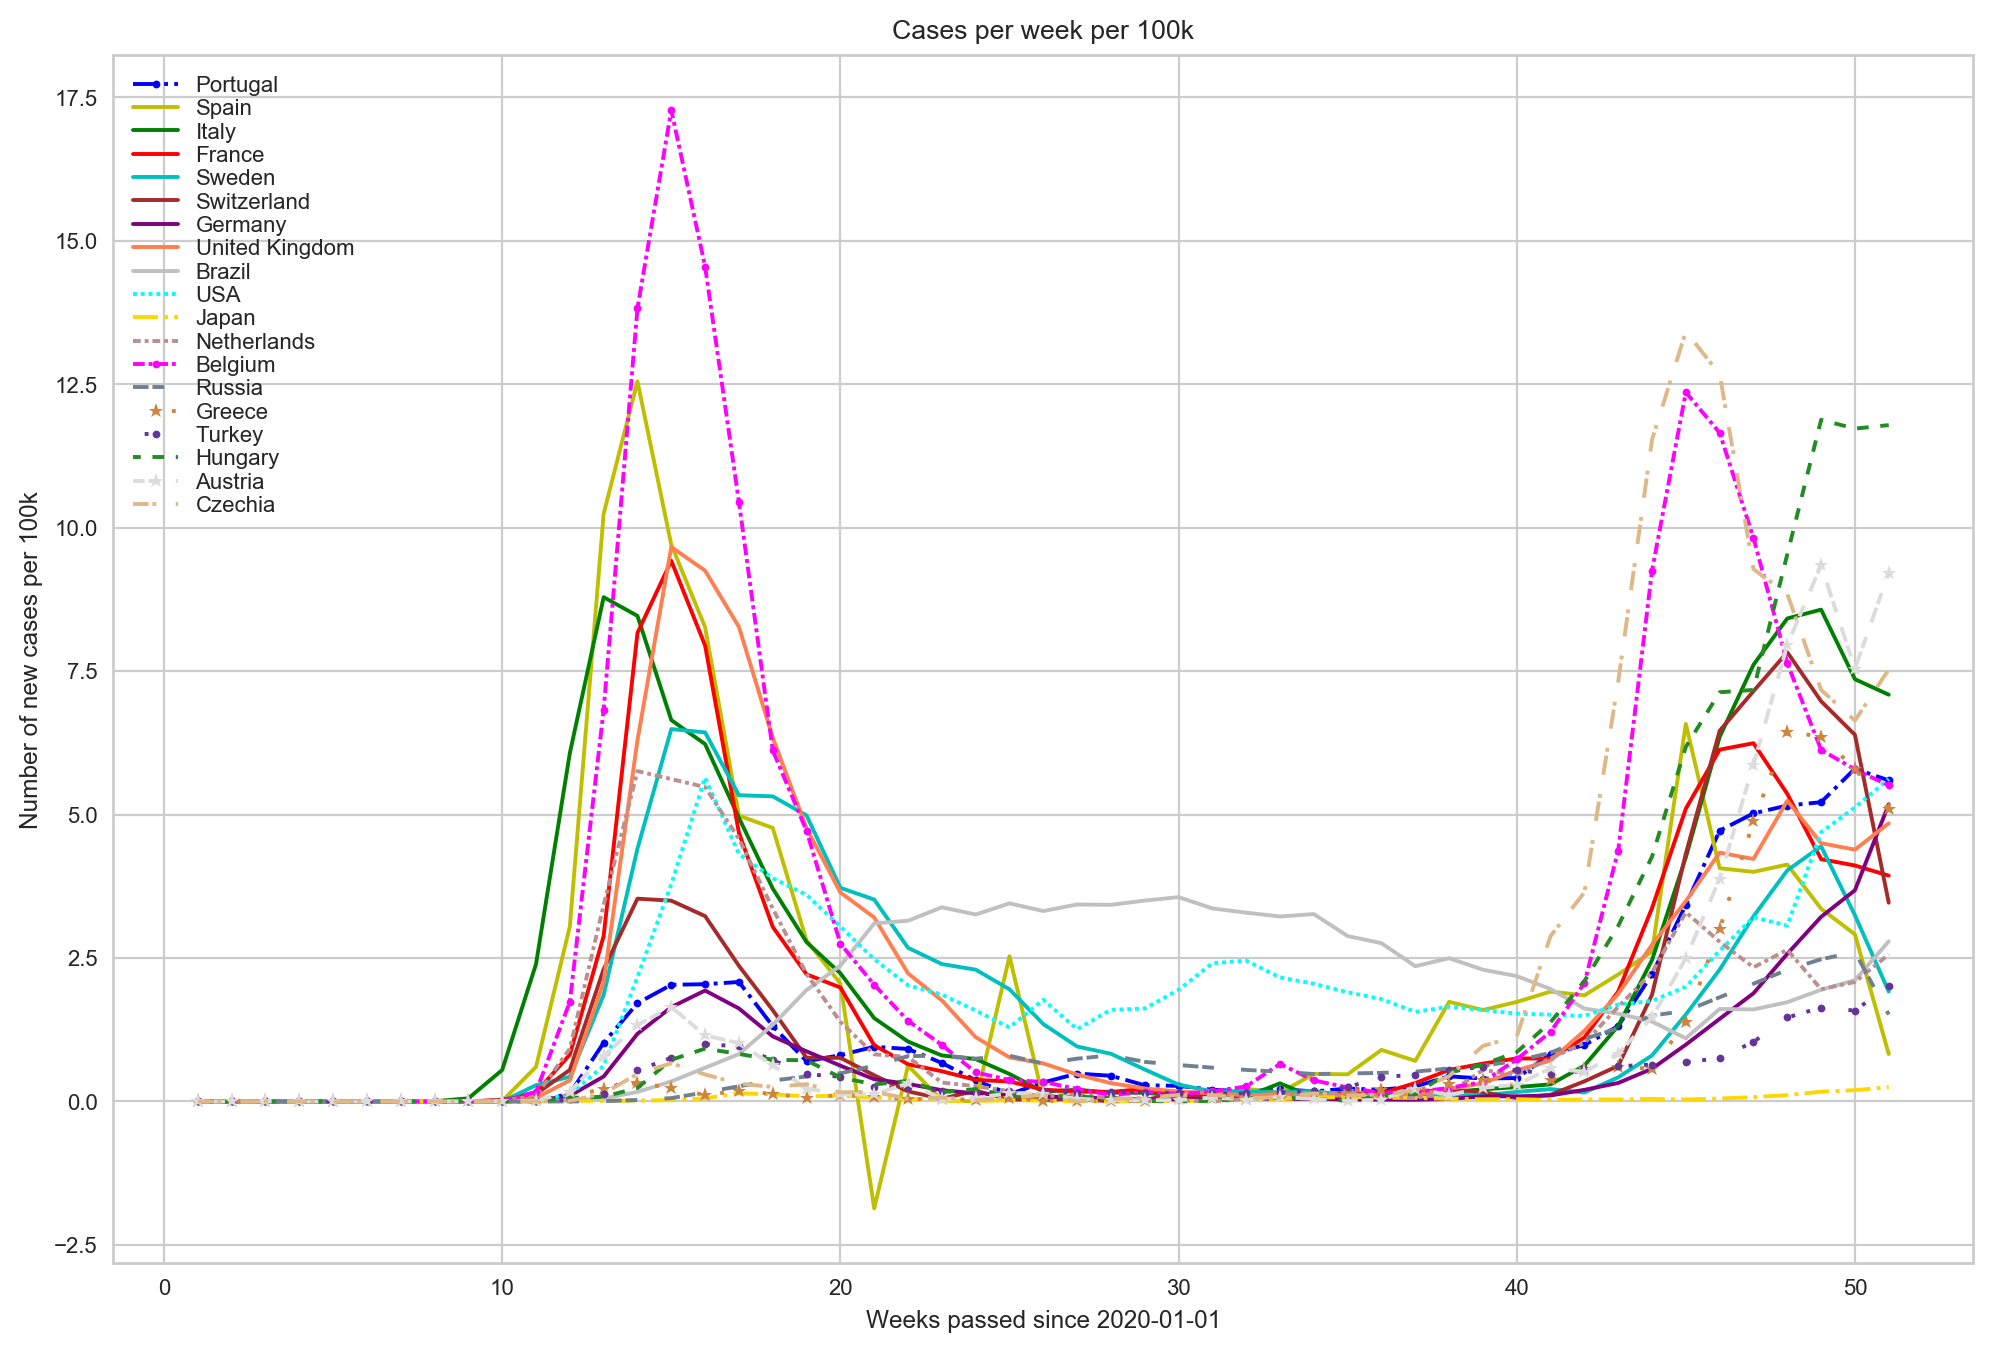

In [118]:
# # CASOS POSITIVOS POR SEMANA
for country_index,ID in enumerate(IDs):
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    y=np.zeros(NW)
    x=np.arange(1,NW+1)
    NWcountry=len(countries_df[country_index]['cases'].values)
    y[:NWcountry]=countries_df[country_index]['deaths'].values/(countries_df[country_index]['popData2019'].values/100000)
    y=np.flip(y)
    plt.plot(x,y,label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   

plt.legend()
plt.xlabel("Weeks passed since 2020-01-01")
plt.ylabel('Number of new cases per 100k')
plt.title('Cases per week per 100k');

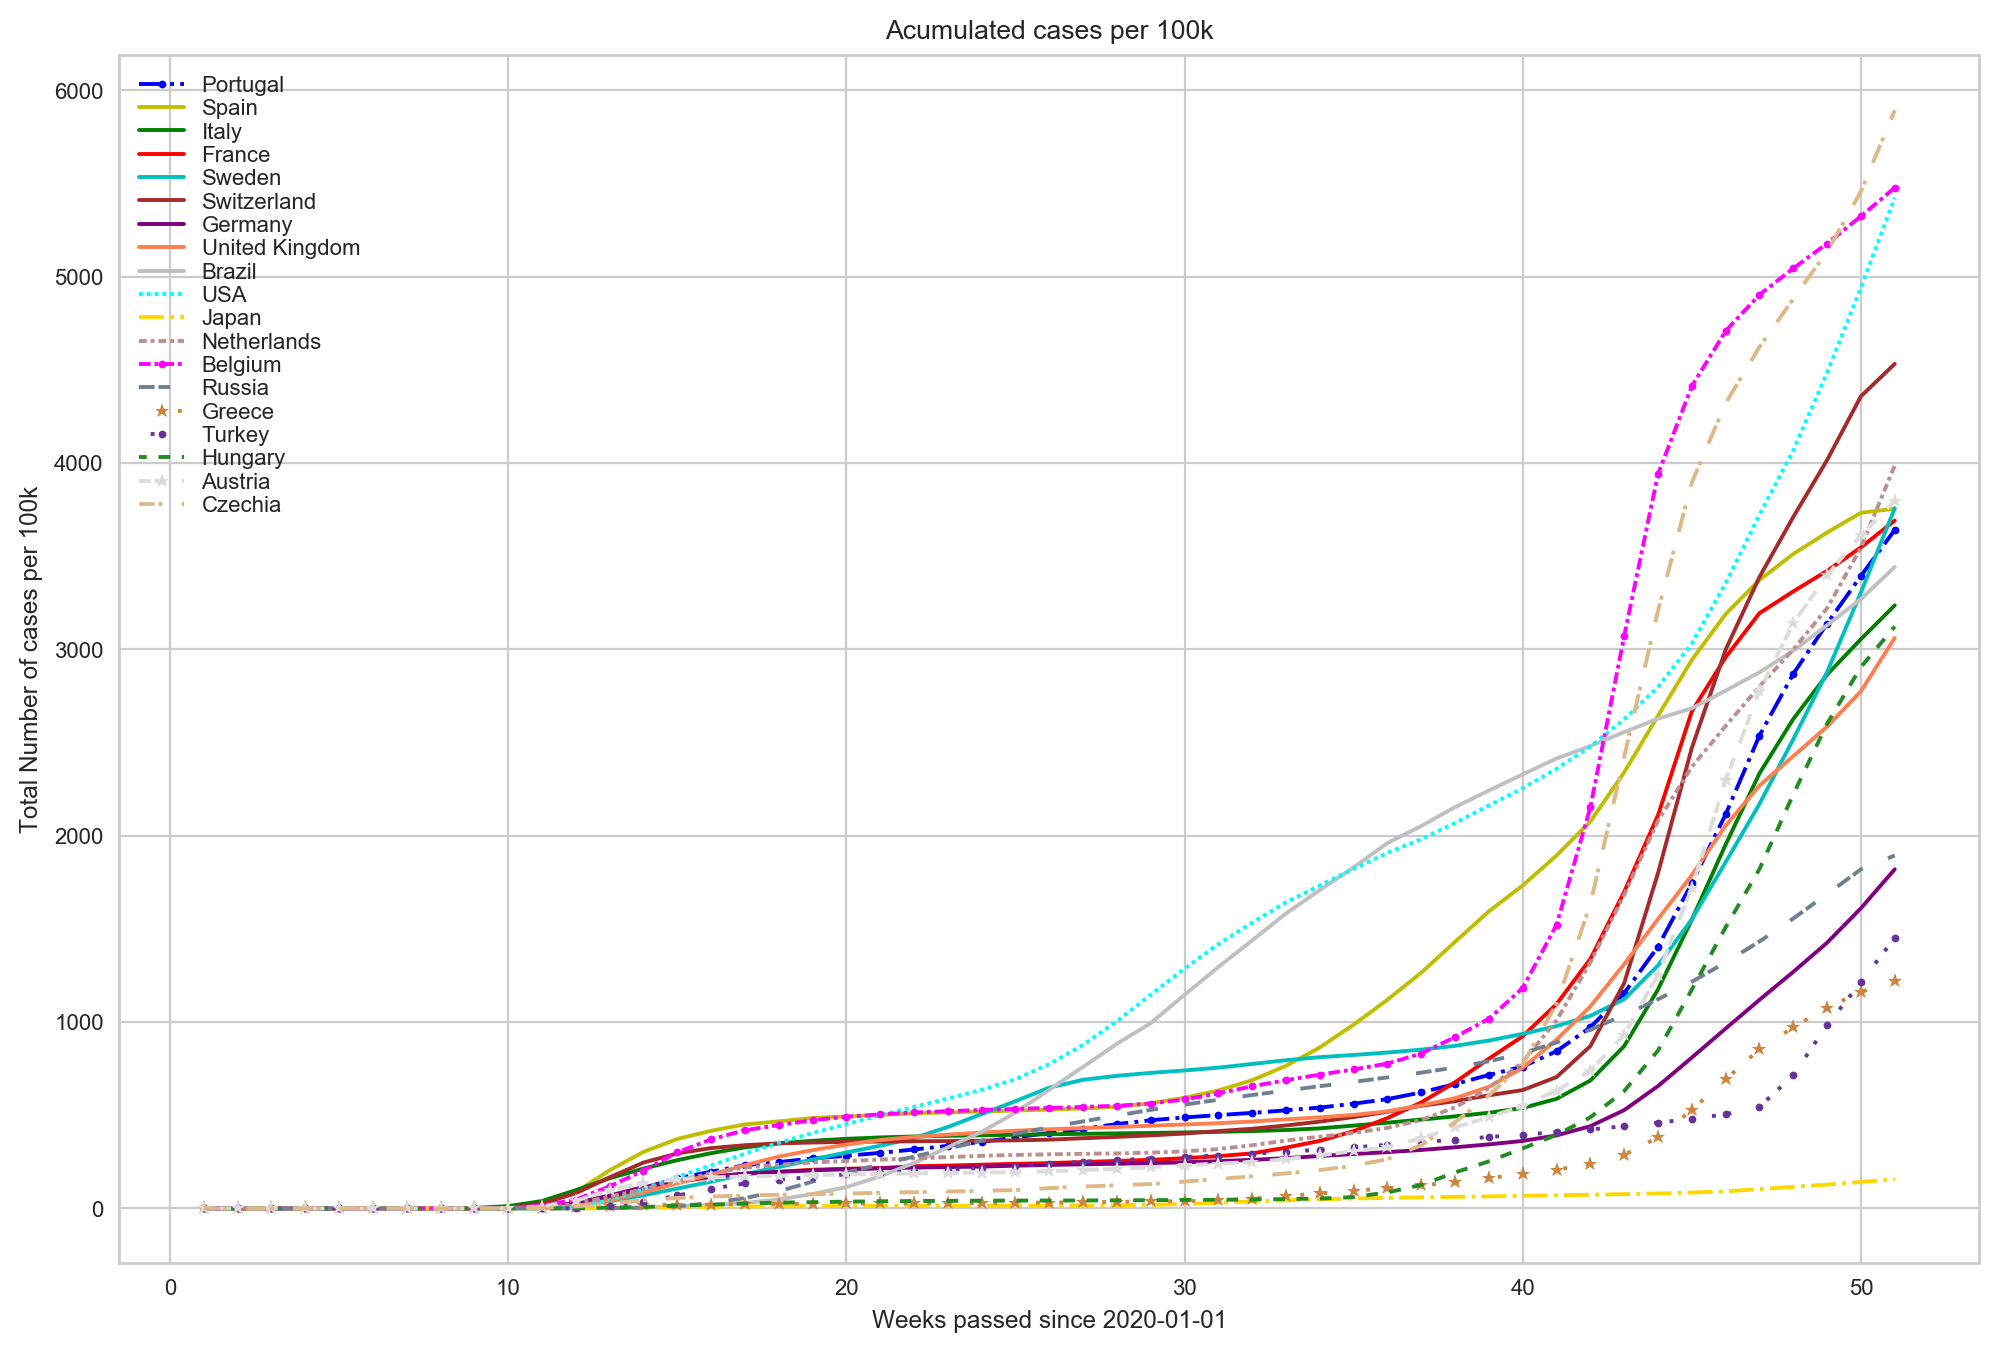

In [123]:
for country_index,ID in enumerate(IDs):
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    y=np.zeros(NW)
    x=np.arange(1,NW+1)
    NWcountry=len(countries_df[country_index]['cases'].values)
    y[:NWcountry]=countries_df[country_index]['cases'].values
    y=np.flip(y)
    y=y.cumsum()/(countries_df[country_index]['popData2019'].values[0]/100000)
    plt.plot(x,y,label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   

plt.legend()
plt.xlabel('Weeks passed since 2020-01-01')
plt.ylabel('Total Number of cases per 100k')
plt.title('Acumulated cases per 100k');

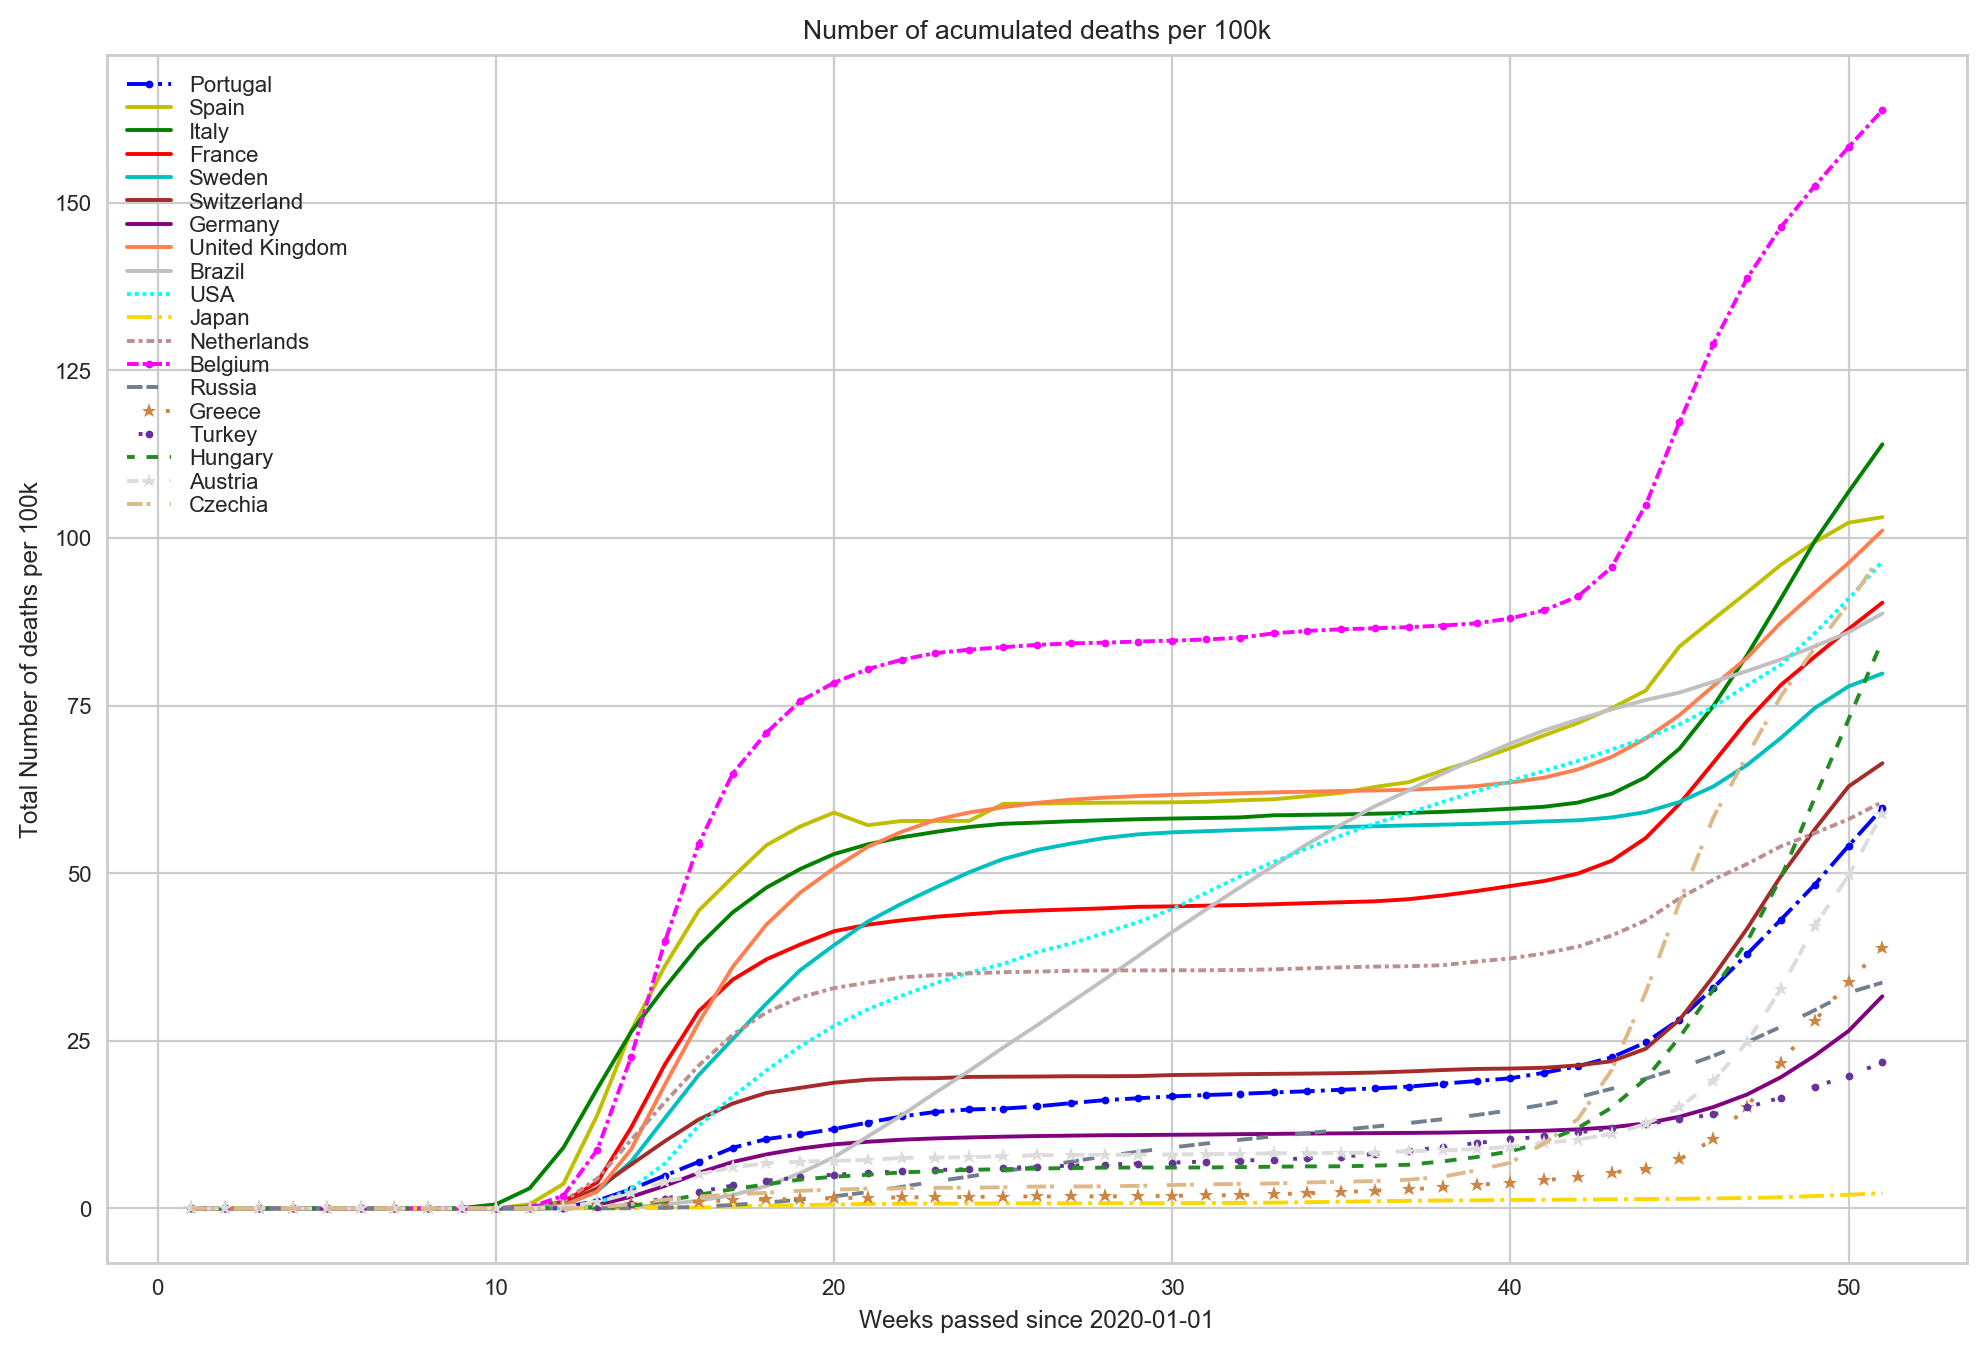

In [125]:
for country_index,ID in enumerate(IDs):
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    y=np.zeros(NW)
    x=np.arange(1,NW+1)
    NWcountry=len(countries_df[country_index]['cases'].values)
    y[:NWcountry]=countries_df[country_index]['deaths'].values
    y=np.flip(y)
    y=y.cumsum()/(countries_df[country_index]['popData2019'].values[0]/100000)
    plt.plot(x,y,label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   

plt.legend()
plt.xlabel('Weeks passed since 2020-01-01')
plt.ylabel('Total Number of deaths per 100k')
plt.title('Number of acumulated deaths per 100k');

In [ ]:
############################################## RECUPERADOS #################
#for country in countrieslist0:
#    plt.plot(moving_average(country['recovered']/country['pop'],MA),
#             label=country['country']+' '+
#             str(round(country['recovered'].max()/country['pop'],1))+'(por 100k)',
#             ls=country['ls'],marker=country['markers'],
#             color=country['color'])

#plt.xlabel("dias após primeiro caso")
#plt.legend(loc='upper left')
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])
#plt.title('Evolução do nº de recuperados por 100k '+str(date.today()))

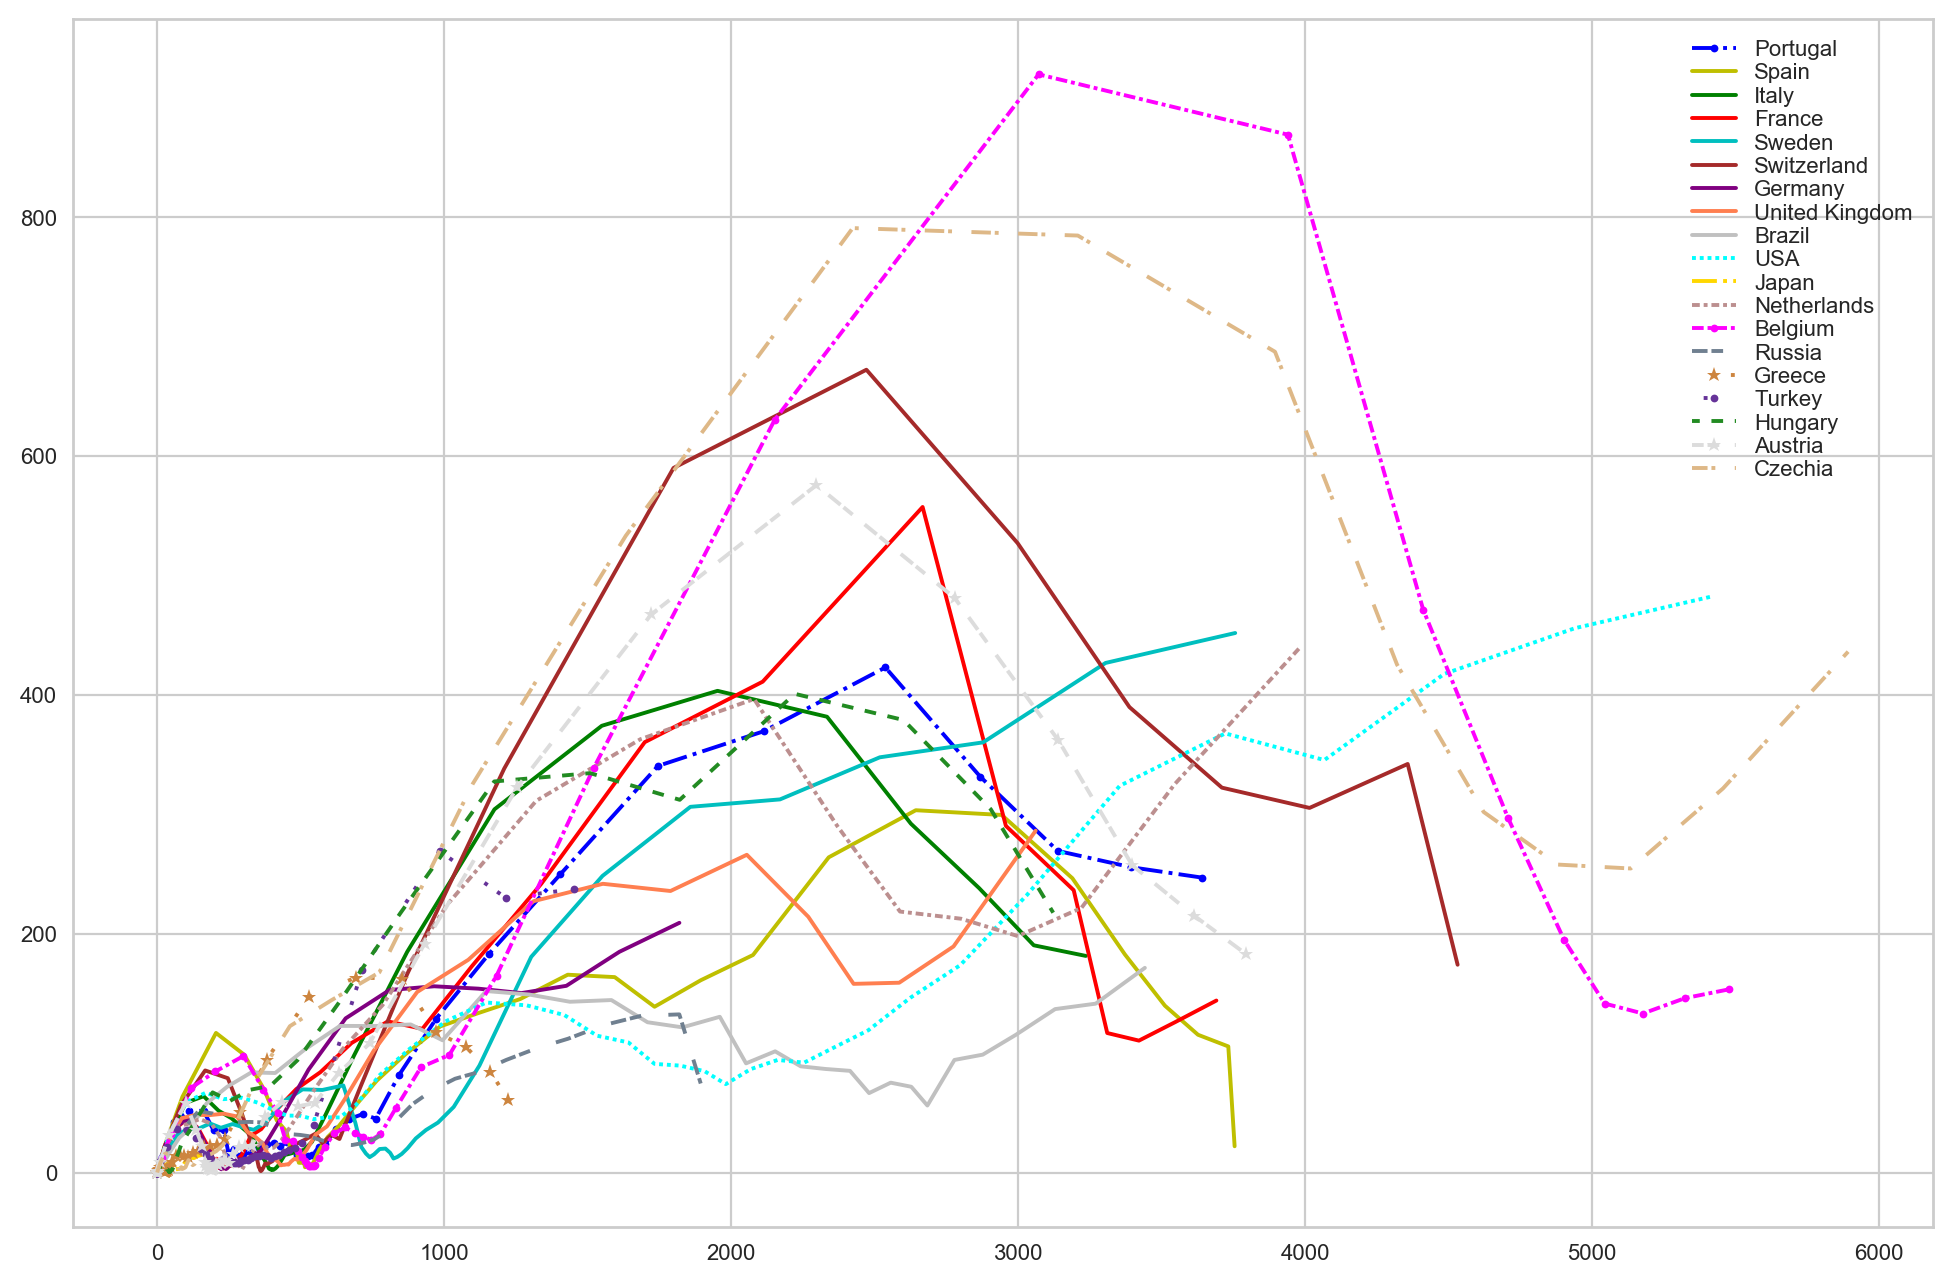

In [126]:
#  # CURVAS DE FASE DE CRESCIMENTO DE CASOS POSITIVOS
for country_index,ID in enumerate(IDs):
    y=np.zeros(NW)
    NWcountry=len(countries_df[country_index]['cases'].values)
    y[:NWcountry]=countries_df[country_index]['cases'].values
    y=np.flip(y)
    x=y.cumsum()/(countries_df[country_index]['popData2019'].values[0]/100000)
    y=y/(countries_df[country_index]['popData2019'].values[0]/100000)
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    #x=countries_df[country_index]['cases'].values.cumsum()/(countries_df[country_index]['popData2019'].values/100000)
    #y=countries_df[country_index]['cases'].values/(countries_df[country_index]['popData2019'].values/100000)
    plt.plot(x,y,label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   

plt.legend()
#for country in countrieslist0:
#    plt.plot(moving_average(country['cases'].cumsum()/country['pop'],MA),moving_average(country['cases']/country['pop'],MA),
#             label=country['country'], ls=country['ls'],marker=country['markers'],color=country['color'])
#plt.xlabel("Números de casos por 100k")
#plt.title('velocidade de crescimento de casos positivos\n em função do número de casos (por 100k) (média móvel a '+str(MA)+' dias) '+str(date.today()))
#plt.legend()

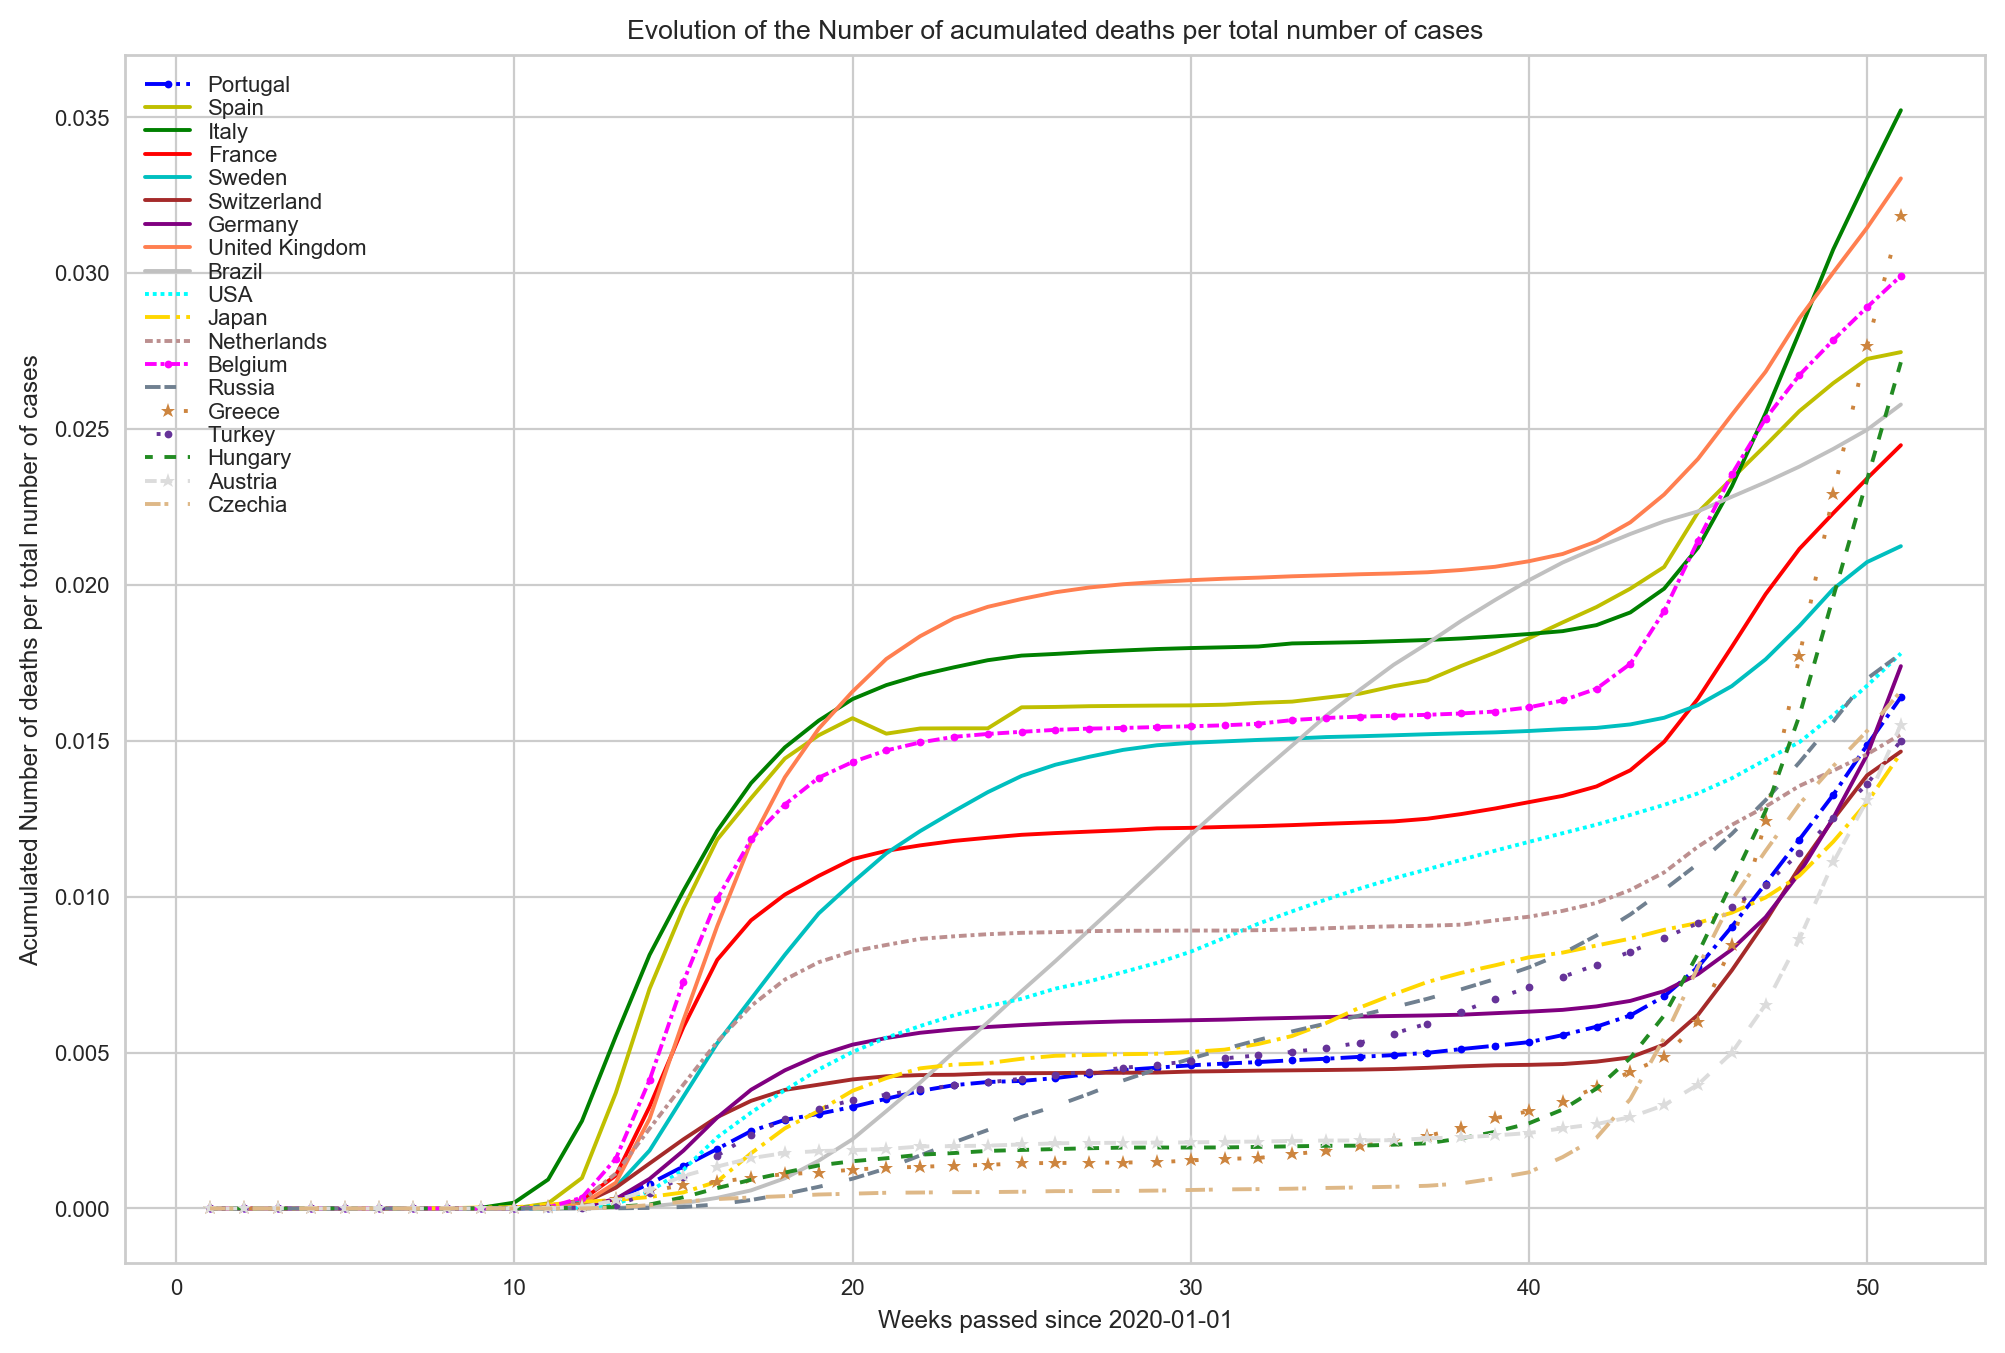

In [131]:
for country_index,ID in enumerate(IDs):
    y=np.zeros(NW)
    x=np.arange(1,NW+1)
    NWcountry=len(countries_df[country_index]['deaths'].values)
    y[:NWcountry]=countries_df[country_index]['deaths'].values
    y=np.flip(y)
    y=y.cumsum()/countries_df[country_index]['cases'].values.sum()
    plt.plot(x,y,label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   

plt.legend()
plt.xlabel('Weeks passed since 2020-01-01')
plt.ylabel('Acumulated Number of deaths per total number of cases')
plt.title('Evolution of the Number of acumulated deaths per total number of cases');

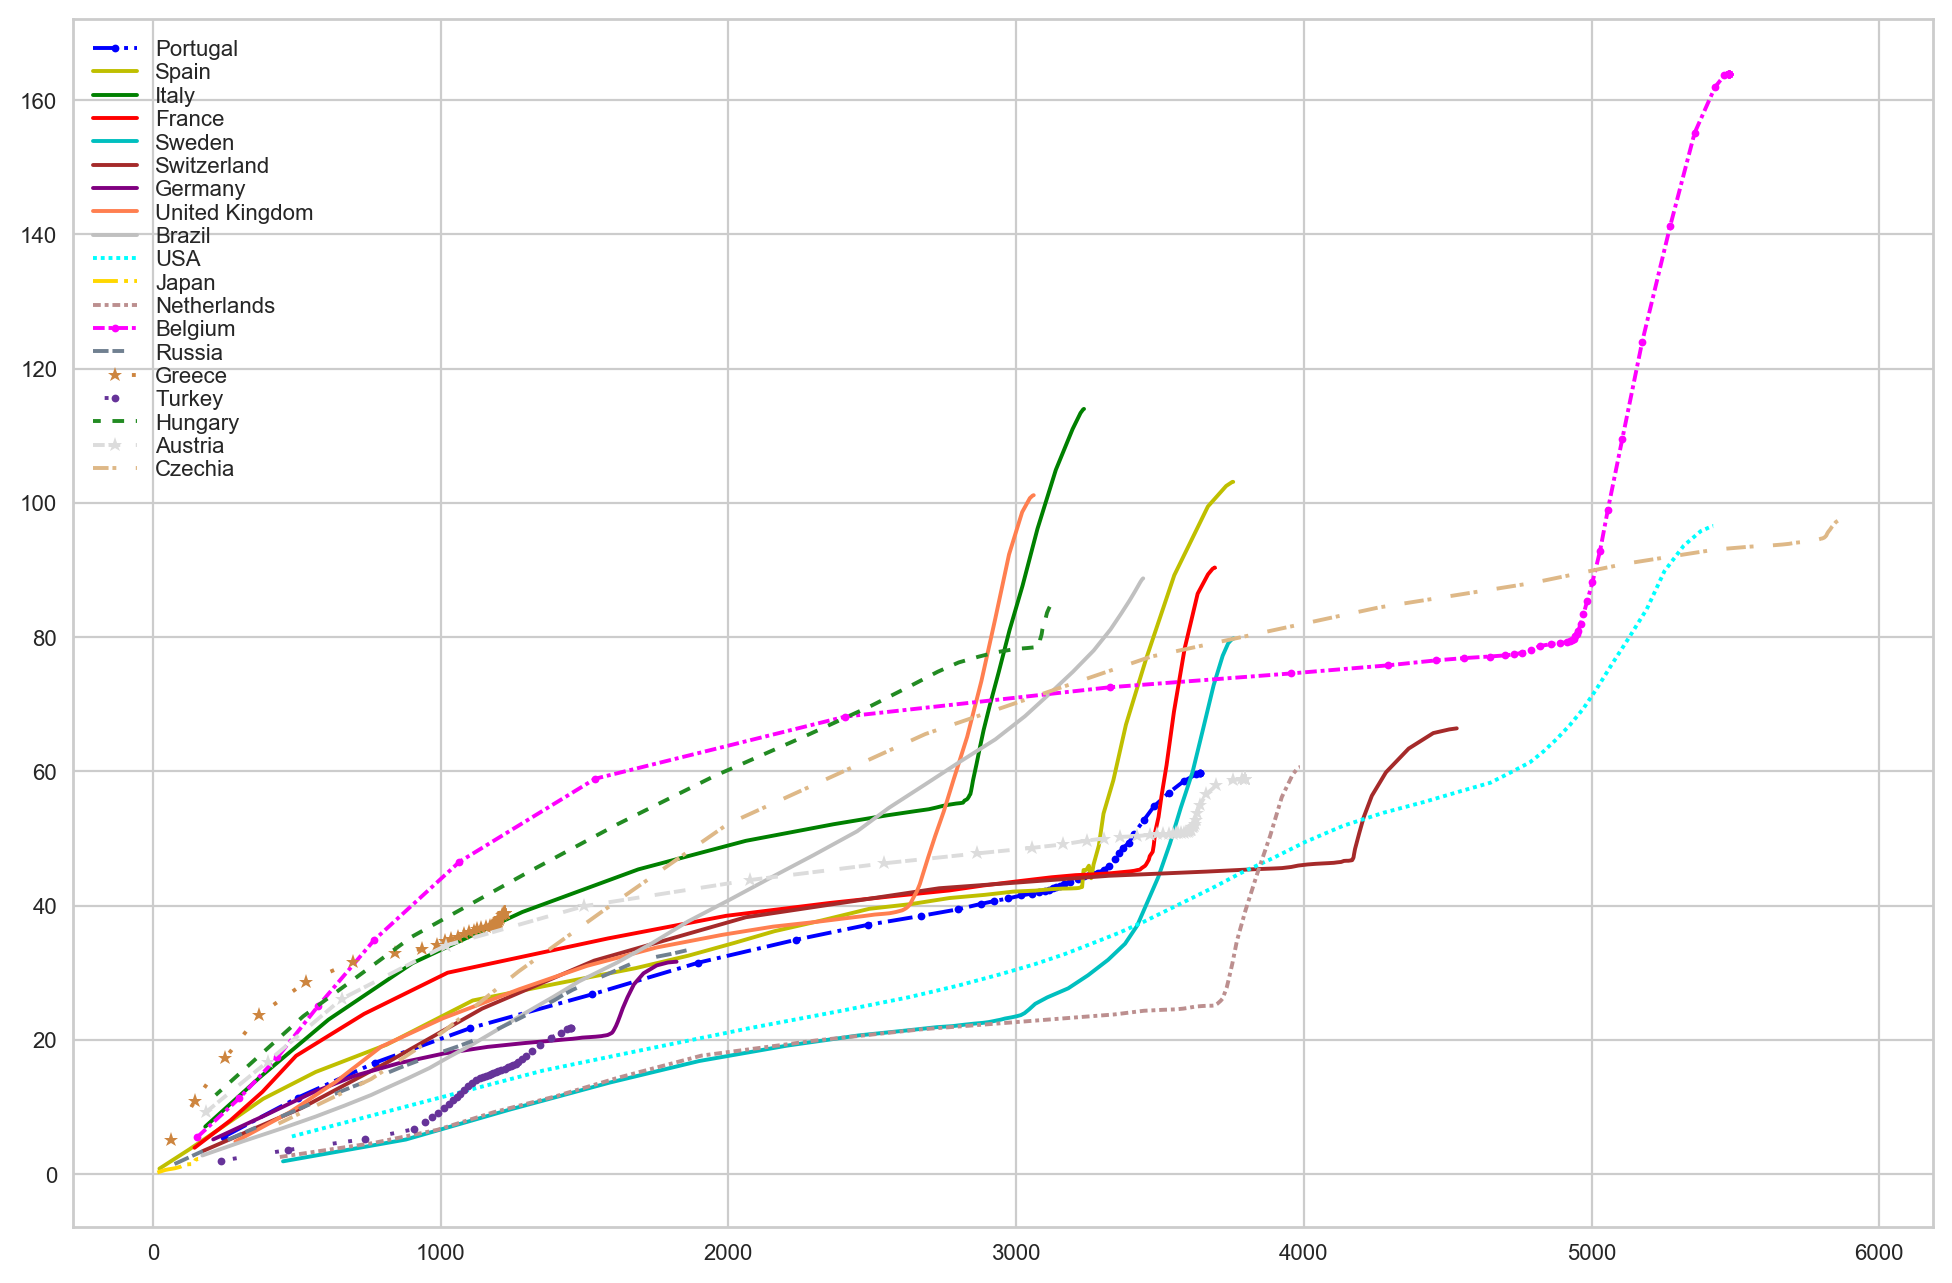

In [80]:
for country_index,ID in enumerate(IDs):
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    x=countries_df[country_index]['cases'].values.cumsum()/(countries_df[country_index]['popData2019'].values/100000)
    y=countries_df[country_index]['deaths'].values.cumsum()/(countries_df[country_index]['popData2019'].values/100000)
    plt.plot(x,y,label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   

plt.legend()

#for country in countrieslist0:
#    plt.plot(country['cases'].cumsum()/country['pop'],country['deaths'].cumsum()/country['pop'],
#        label=country['country']+' '+str(round(country['deaths'].sum()/country['cases'].sum()*100,2))+'%',
#             ls=country['ls'],marker=country['markers'],
#        color=country['color'])

#plt.xlabel("nº casos por 100k")
#plt.legend(loc='lower right')
#plt.title('(fase) nº mortos/100k em função do nº casos/100k '+str(date.today()))

In [83]:
# # %  TOTAL DEATHS PER TOTAL NUMBER OF CASES * 100
print('Taxa de Letalidade: Percentagem de mortos por número de casos\n')
for country_index,ID in enumerate(IDs):
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    y=countries_df[country_index]['deaths'].values.sum()
    x=countries_df[country_index]['cases'].values.sum()
    #plt.plot(x,y,label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   
    print(ID['country'],'=',round(y/x*100,1),'%')




Portugal = 1.6 %
Spain = 2.7 %
Italy = 3.5 %
France = 2.4 %
Sweden = 2.1 %
Switzerland = 1.5 %
Germany = 1.7 %
United Kingdom = 3.3 %
Brazil = 2.6 %
USA = 1.8 %
Japan = 1.5 %
Netherlands = 1.5 %
Belgium = 3.0 %
Russia = 1.8 %
Greece = 3.2 %
Turkey = 1.5 %
Hungary = 2.7 %
Austria = 1.6 %
Czechia = 1.7 %


In [88]:
print('Número mortos por 100k  habitantes\n')
# # %  TOTAL DEATHS PER TOTAL NUMBER OF CASES * 100
for country_index,ID in enumerate(IDs):
    #x=-np.arange(1,len(np.array(countries_df[country_index]['year_week']).flatten())+1)+1
    y=countries_df[country_index]['deaths'].values.sum()/(countries_df[country_index]['popData2019'].values[1]/100000)
    #plt.plot(x,y,label=ID['country'],color=ID['color'],ls=ID['ls'],marker=ID['markers'])   
    print(ID['country'],'=',round(y,1))

Número mortos por 100k  habitantes

Portugal = 59.7
Spain = 103.1
Italy = 114.0
France = 90.4
Sweden = 79.8
Switzerland = 66.4
Germany = 31.6
United Kingdom = 101.1
Brazil = 88.7
USA = 96.5
Japan = 2.3
Netherlands = 60.6
Belgium = 163.8
Russia = 33.7
Greece = 38.9
Turkey = 21.8
Hungary = 84.7
Austria = 58.9
Czechia = 97.8
